# Import Library

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read & Analyze Data

In [2]:
file_path = 'training_data.csv'
df = pd.read_csv(file_path)
df.head()

,size (square feet),number of bedrooms,price ($)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


- Comment: 
    - Each columns is not missing any value.
    - This table has 3 columns: size, number of bedrooms and price of that area.

In [3]:
df.describe()

,size (square feet),number of bedrooms,price ($)
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


- Comment: 
    - Training set has 47 rows
    - This table shows details of training set, including count, mean, std, ...

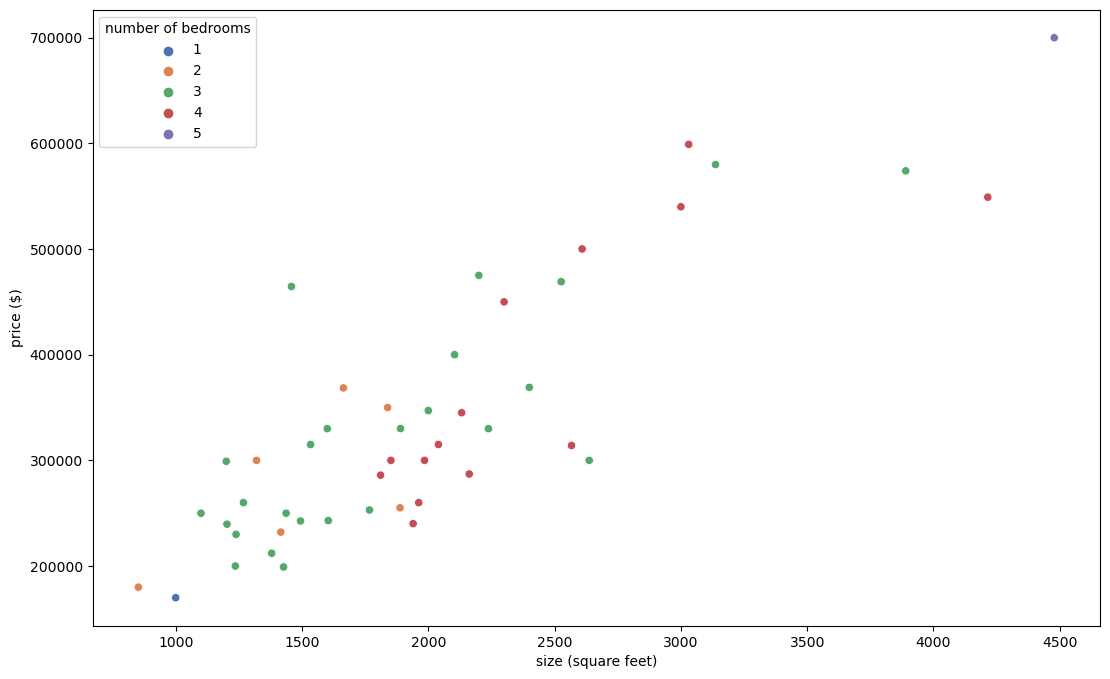

In [4]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(data=df, x='size (square feet)', y='price ($)', 
                     hue='number of bedrooms', palette='deep')
plt.show()

- Comment: 
    - Almost points are converged on straight line
    - Some points are not on that line
    - Almost points concentrate at the bottom-left of the graph and some outliner at the top-right of the graph.

# Helper Functions

In [5]:
def standardize_train_set(X):
    #todo
    # Mean
    mu = np.mean(X, axis=0)
    #todo
    # Standard Deviation
    sigma = np.std(X, axis=0)
    #todo
    # Standard Data
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [6]:
def standardize_test_set(X, mu, sigma):
    #todo
    # Standard Data
    X_test_norm = (X - mu) / sigma
    return X_test_norm

In [7]:
class LinearRegression:
    def __init__(self, alpha=0.001, iters=1000, verbose=False):
        self.alpha = alpha
        self.iters = iters
        self.verbose = verbose
        self.theta = None
    
    def calculate_absolute_error(self, X, y, theta):
        #todo
        h_theta = np.dot(X, theta.T)
        absolute_errors = np.abs(h_theta - y)
        
        return absolute_errors
    
    def gradient(self, X, y, theta):
        m = len(y)

        #todo
        h_theta = np.dot(X, theta.T)
        loss = h_theta - y

        #todo
        dJ = (1/m) * np.dot(X.T, loss)
        J = np.sum((loss ** 2) / (2*m))

        return (J, dJ)
    
    def gradient_descent(self, X, y):
        X = np.c_[np.ones(len(X),dtype='int64'), X]
        theta = np.zeros(X.shape[1])
        print(f'The total of training sample: {len(y)}')
        for i in range(self.iters):
            #todo
            J, dJ = self.gradient(X, y, theta)
            #todo
            theta = theta - self.alpha * dJ
            if self.verbose:
                print(f'Iter {i + 1}, loss = {self.calculate_absolute_error(X, y, theta)}')
        
        return theta
    
    def fit(self, X, y):
        self.theta = self.gradient_descent(X, y)
    
    def predict(self, X):
        results = []        
        #todo
        X = np.c_[np.ones(len(X), dtype='int64'), X]
        results = np.dot(X, self.theta)
          
        return results

# Main Function

## Train Model

In [8]:
#Load config
with open('config.json',) as f:
    configs = json.load(f)
#Feature-Label split
array = np.array(df)
#todo
X = array[:, :-1]
#todo
y = array[:, -1]
#Standardize feature and Train model
X, mu, sigma = standardize_train_set(X)
model = LinearRegression(alpha= configs['alpha'], iters=configs['iters'], verbose=False)
model.fit(X, y)

The total of training sample: 47


## Visualize Model

In [9]:
x_surf, y_surf = np.meshgrid(np.linspace(df['size (square feet)'].min(), df['size (square feet)'].max()),
                 np.linspace(df['number of bedrooms'].min(), df['number of bedrooms'].max()))

surf_df = pd.DataFrame({'size (square feet)': x_surf.ravel(), 'number of bedrooms': y_surf.ravel()})
predicted = np.array(model.predict(standardize_test_set(surf_df.values, mu, sigma)))

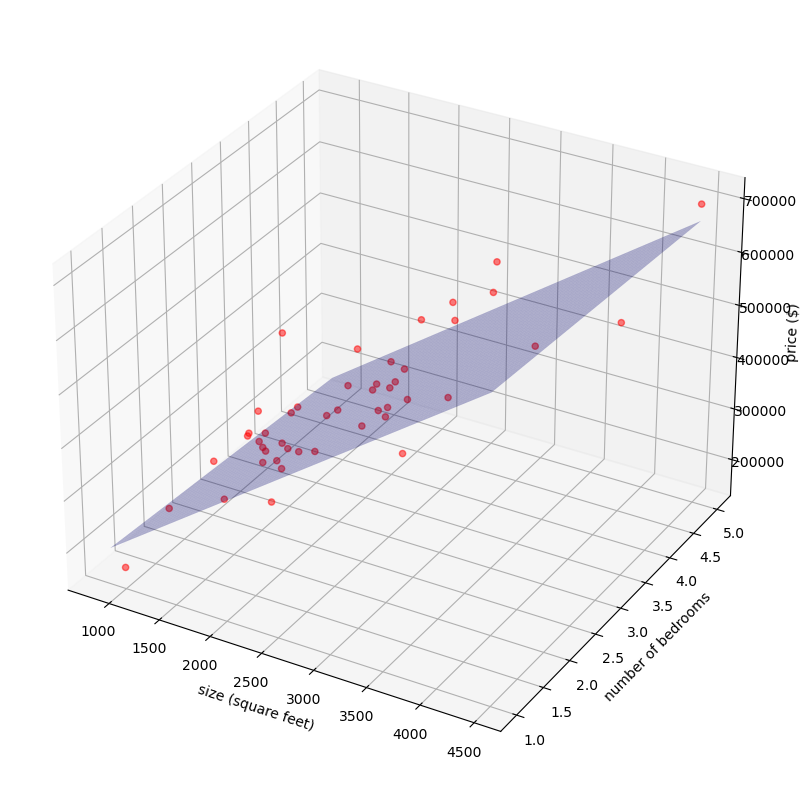

In [10]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['size (square feet)'], df['number of bedrooms']
           ,df['price ($)'], c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predicted.reshape(x_surf.shape), color='b', alpha=0.3)

ax.set_xlabel('size (square feet)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price ($)')
plt.show()

- Comment:
    - The blue space represents the predicted values, the points are the real values.
    - The blue space covers almost the points, so that this model is reliable. 

## Predict Sample

In [11]:
sample = [1650, 3]
#todo
X_predict = np.array(sample).reshape(1, -1)
y_predict = np.array(model.predict(standardize_test_set(X_predict, mu, sigma)))
print(f'House price expected is {round(y_predict[0])}$')

House price expected is 293222$


## Save Results

In [12]:
#Save model
with open('model.json', 'w') as f:
    #todo
    json.dump({'theta: ': model.theta.tolist()}, f)
#Save prediction result
with open('price.json', 'w') as f:
    result = {
        #todo
        'size (square feet)': sample[0],
        #todo
        'number of bedrooms': sample[1],
        #todo
        'price ($)': round(y_predict[0])
    }
    json.dump(result, f)